In [ ]:
if(!require(psych)){ install.packages("psych")}
if(!require(FSA)){ install.packages("FSA")}
if(!require(lattice)){ install.packages("lattice")}
if(!require(lsr)){ install.packages("lsr")}
if(!require(rcompanion)){ install.packages("rcompanion")}
if(!require(ggplot2)){ install.packages("ggplot2")} # Install & load ggplot2

In [ ]:
library(rcompanion)
library(psych)
library(dplyr)
library(base)
library(ggplot2)

In [3]:
Data = read.csv("Datos tarea 1.csv", 
                 header = TRUE,
                 sep = ",")

## Verificar que los datos se cargaron correctamente

In [4]:
headTail(Data)

,Date,Time,Employee,Part,Test_id,Lot,Reel,Barcode.Batch,Sublot,Start.Datetime,Handler,Fixture,Analyzer_id,Test_step,Sequence,failcode,Stpbnd.2400.2482..S21..1.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,5/10/2017,18:58:47,30926,QM25012,NA,Control,RL503439,235819,8,2017-05-10 18:57:55,C322,4,100408,FT,142,0,28.11
2,5/10/2017,18:58:47,30926,QM25012,NA,Control,RL503439,235819,8,2017-05-10 18:57:55,C322,4,100408,FT,141,0,28
3,5/10/2017,18:58:47,30926,QM25012,NA,Control,RL503439,235819,8,2017-05-10 18:57:55,C322,4,100408,FT,143,0,27.68
4,5/10/2017,18:54:42,30926,QM25012,NA,Control,RL503439,235819,7,2017-05-10 18:47:44,C322,4,100408,FT,509,0,27.79
...,NA,NA,...,NA,NA,NA,NA,...,...,NA,NA,...,...,NA,...,...,...
244681,5/16/2017,00:46:56,40638,QM25012,NA,Exp 5,RL505450,339003,8,2017-05-16 00:20:42,C322,4,100408,FT,4322,0,25.09
244682,5/16/2017,00:46:56,40638,QM25012,NA,Exp 5,RL505450,339003,8,2017-05-16 00:20:42,C322,4,100408,FT,4323,0,25.18
244683,5/16/2017,00:29:12,40638,QM25012,NA,Exp 5,RL505450,339003,8,2017-05-16 00:20:42,C322,4,100408,FT,1362,0,25.23
244684,5/16/2017,00:29:12,40638,QM25012,NA,Exp 5,RL505450,339003,8,2017-05-16 00:20:42,C322,4,100408,FT,1363,0,25.78


In [5]:
colnames(Data)

[1] "Date"                      "Time"                     
 [3] "Employee"                  "Part"                     
 [5] "Test_id"                   "Lot"                      
 [7] "Reel"                      "Barcode.Batch"            
 [9] "Sublot"                    "Start.Datetime"           
[11] "Handler"                   "Fixture"                  
[13] "Analyzer_id"               "Test_step"                
[15] "Sequence"                  "failcode"                 
[17] "Stpbnd.2400.2482..S21..1."

#### Renombrando columna Stpbnd.2400.2482..S21..1. a Stpbnd para facilidad

In [6]:
names(Data)[names(Data) == "Stpbnd.2400.2482..S21..1."] <- "Stpbnd"

In [7]:
colnames(Data)

[1] "Date"           "Time"           "Employee"       "Part"          
 [5] "Test_id"        "Lot"            "Reel"           "Barcode.Batch" 
 [9] "Sublot"         "Start.Datetime" "Handler"        "Fixture"       
[13] "Analyzer_id"    "Test_step"      "Sequence"       "failcode"      
[17] "Stpbnd"

In [8]:
summary(Data)

     Date               Time              Employee         Part          
 Length:244684      Length:244684      Min.   :30527   Length:244684     
 Class :character   Class :character   1st Qu.:30926   Class :character  
 Mode  :character   Mode  :character   Median :34218   Mode  :character  
                                       Mean   :35935                     
                                       3rd Qu.:40638                     
                                       Max.   :41989                     
 Test_id            Lot                Reel           Barcode.Batch   
 Mode:logical   Length:244684      Length:244684      Min.   : 24091  
 NA's:244684    Class :character   Class :character   1st Qu.:251439  
                Mode  :character   Mode  :character   Median :454035  
                                                      Mean   :482107  
                                                      3rd Qu.:744577  
                                                      Ma

## 4. Obtenga para cada lote: tamaño de muestra, mínimo, máximo, rango, media, promedio y desviación estándar.

In [9]:
Summarize(Stpbnd ~ Lot, data=Data, digits=4)

Lot,n,mean,sd,min,Q1,median,Q3,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Control,21039,28.0186,2.0786,12.932,27.6325,27.808,27.988,49.570
Exp 1,42479,26.4612,2.0947,4.258,25.9710,26.236,26.524,49.307
Exp 2,46350,26.1855,2.0192,12.644,25.8810,26.057,26.223,54.794
Exp 3,44311,25.5702,1.8834,4.315,25.2220,25.398,25.579,49.690
Exp 4,45805,26.5679,1.9331,13.495,26.2740,26.461,26.619,55.897
Exp 5,44700,25.5246,1.9478,13.269,25.1590,25.334,25.510,49.982


In [10]:
#box_plot <- boxplot(Stpbnd ~ Lot, data = Data)

## 5. Con la información del punto 4 responda: ¿hay outliers?, en caso de haberlos, elimínelos y vuelva a calcular los indicadores del punto anterior.

### Separar datos de cada experimento para obtener outliers usando boxplot

In [11]:
Data_EC<-subset(Data, Lot == "Control")
Data_E1<-subset(Data, Lot == "Exp 1")
Data_E2<-subset(Data, Lot == "Exp 2")
Data_E3<-subset(Data, Lot == "Exp 3")
Data_E4<-subset(Data, Lot == "Exp 4")
Data_E5<-subset(Data, Lot == "Exp 5")

### Remover outliers usando boxplot

In [12]:
#https://rpubs.com/Mentors_Ubiqum/removing_outliers
outliers_EC <- boxplot(Data_EC$Stpbnd, plot=FALSE)$out
outliers_E1 <- boxplot(Data_E1$Stpbnd, plot=FALSE)$out
outliers_E2 <- boxplot(Data_E2$Stpbnd, plot=FALSE)$out
outliers_E3 <- boxplot(Data_E3$Stpbnd, plot=FALSE)$out
outliers_E4 <- boxplot(Data_E4$Stpbnd, plot=FALSE)$out
outliers_E5 <- boxplot(Data_E5$Stpbnd, plot=FALSE)$out

Data_EC<-Data_EC[-which(Data_EC$Stpbnd %in% outliers_EC),]
Data_E1<-Data_E1[-which(Data_E1$Stpbnd %in% outliers_E1),]
Data_E2<-Data_E2[-which(Data_E2$Stpbnd %in% outliers_E2),]
Data_E3<-Data_E3[-which(Data_E3$Stpbnd %in% outliers_E3),]
Data_E4<-Data_E4[-which(Data_E4$Stpbnd %in% outliers_E4),]
Data_E5<-Data_E5[-which(Data_E5$Stpbnd %in% outliers_E5),]

### Unir datos sin outliers en una tabla diferente

In [13]:
Data_clean <- rbind(Data_EC, Data_E1, Data_E2, Data_E3, Data_E4, Data_E5)

### Volver a calcular indicadores del punto anterior

In [14]:
Summarize(Stpbnd ~ Lot, data=Data_clean, digits=4)

Lot,n,mean,sd,min,Q1,median,Q3,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Control,20602,27.8069,0.2601,27.100,27.633,27.806,27.980,28.521
Exp 1,41748,26.2366,0.3593,25.148,25.968,26.229,26.511,27.353
Exp 2,44892,26.0450,0.2404,25.370,25.883,26.055,26.213,26.734
Exp 3,43482,25.3978,0.2500,24.687,25.221,25.394,25.570,26.114
Exp 4,42155,26.4674,0.2257,25.757,26.319,26.479,26.626,27.136
Exp 5,43949,25.3329,0.2490,24.633,25.158,25.331,25.503,26.036


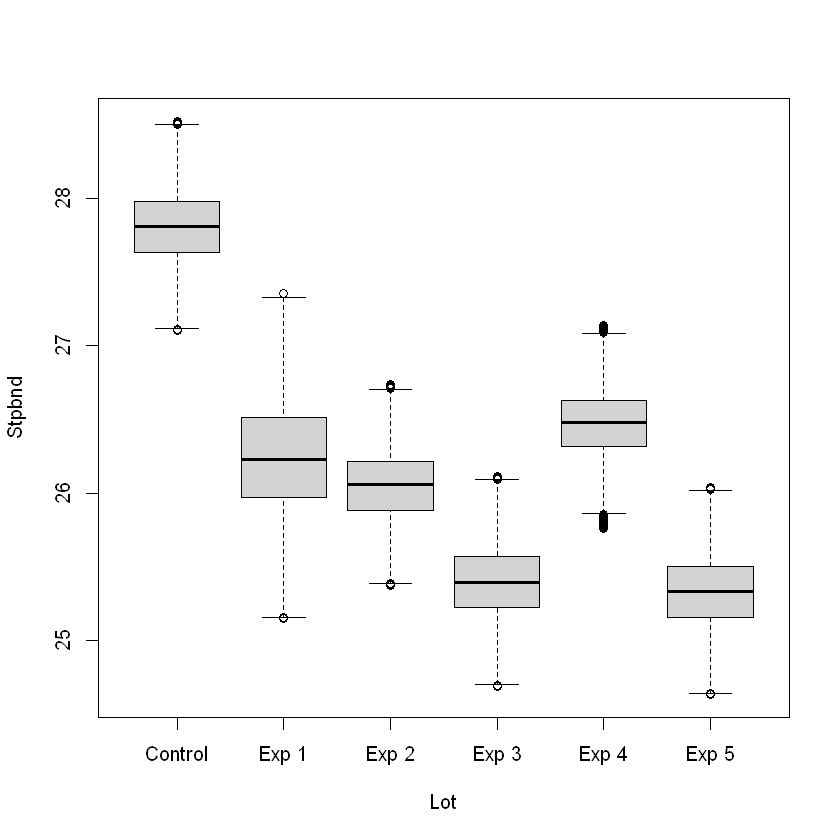

In [15]:
boxplot(Stpbnd ~ Lot, data = Data_clean)

In [16]:
#https://statisticsglobe.com/r-remove-row-from-data-frame-condition
#https://www.datasciencemadesimple.com/delete-or-drop-rows-in-r-with-conditions-2/
#Data_over<-subset(Data, Stpbnd <= 20)
#Data_below<-subset(Data, Stpbnd >= 35)
#Data_clean<-subset(Data, Stpbnd >= 20 & Stpbnd <= 35)

## 7. Grafique un histograma de la especificación Stpbnd(2400-2482)(S21)(1) con la totalidad de los datos del archivo (si ha eliminado outliers, vuelva a incluirlos).

In [19]:
E_ALL = Data$Stpbnd

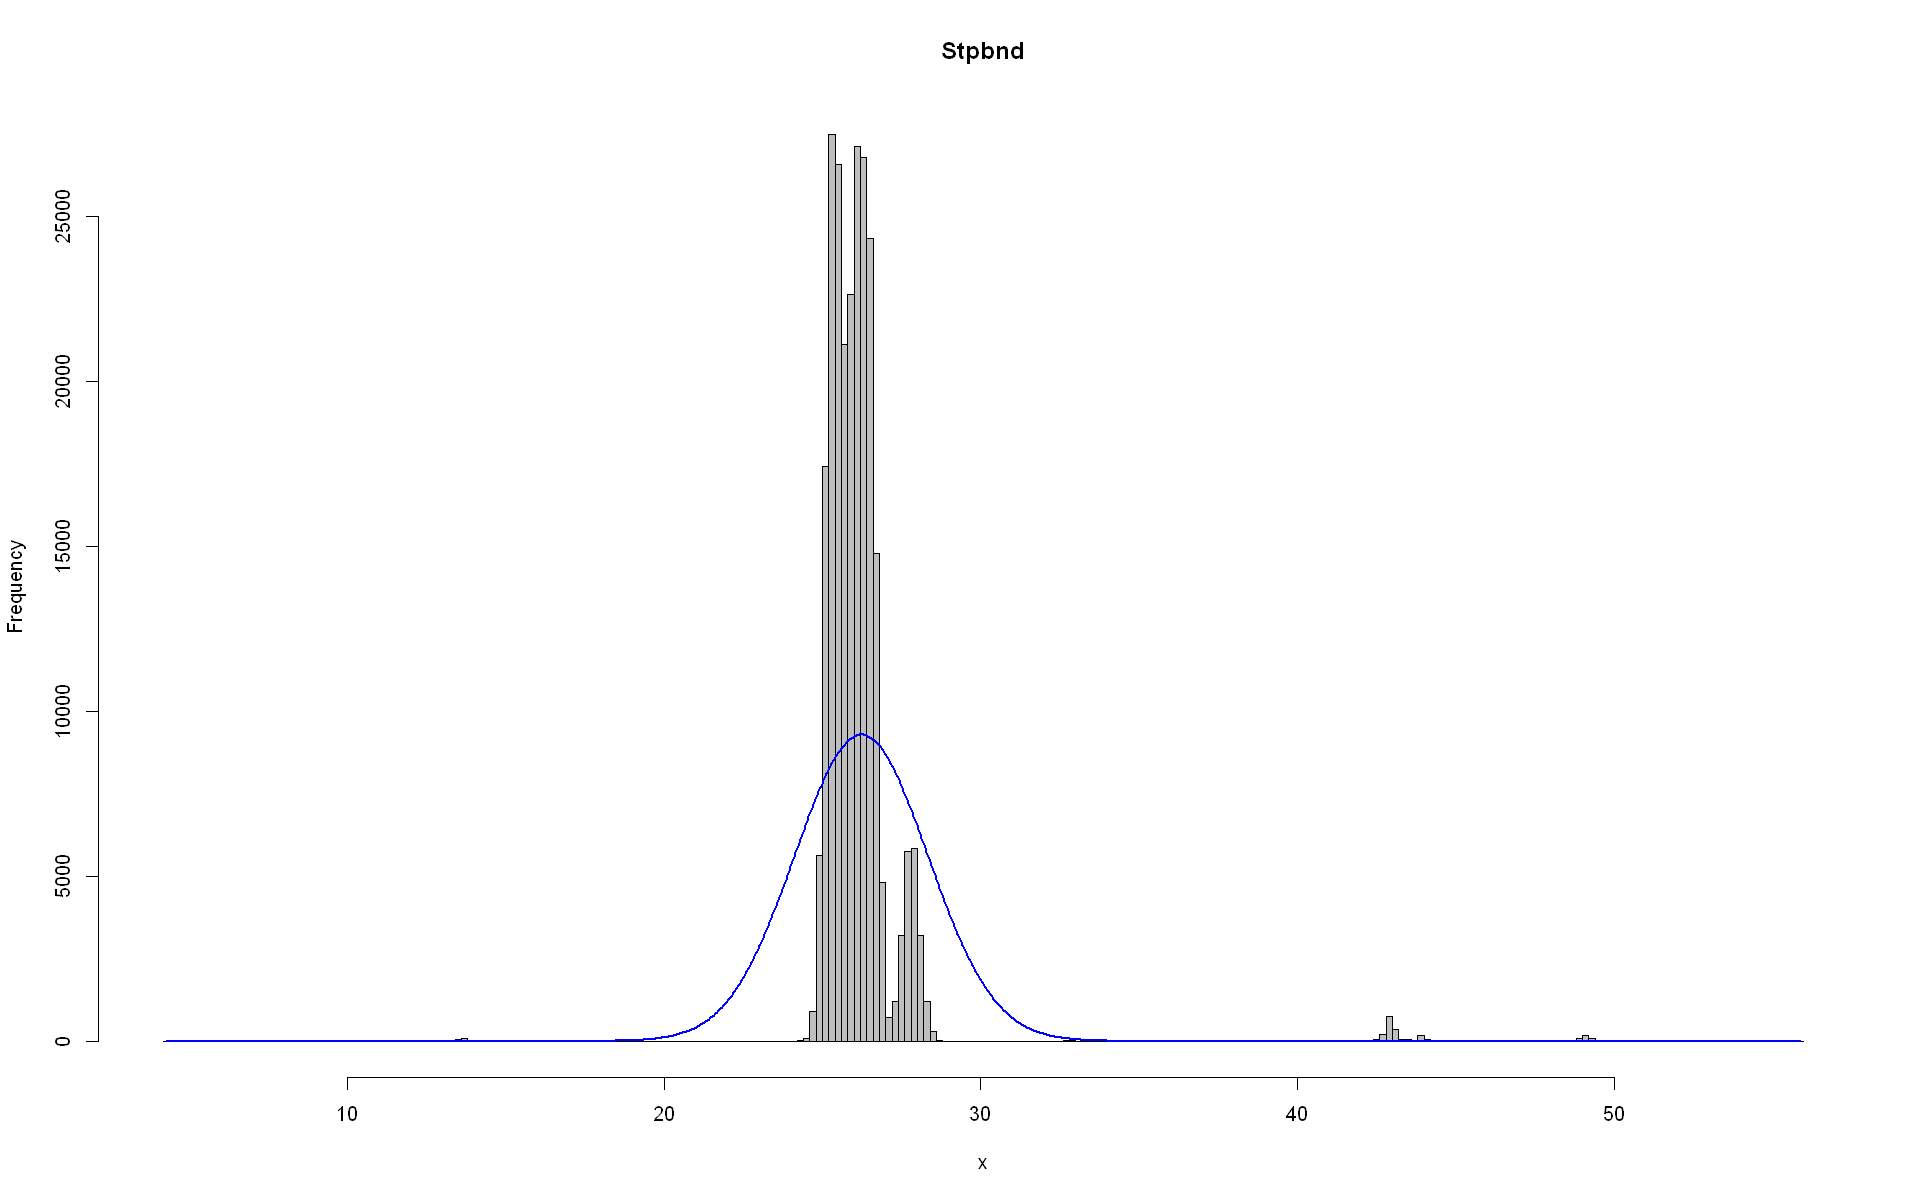

In [20]:
options(repr.plot.width=16, repr.plot.height=10)
plotNormalHistogram(E_ALL, main = "Stpbnd", breaks = 300)

## 10. Elimine los outliers (en caso de haber) y luego vuelva a graficar el histograma, ajuste la escala del eje X para sólo observar la parte que contiene datos.

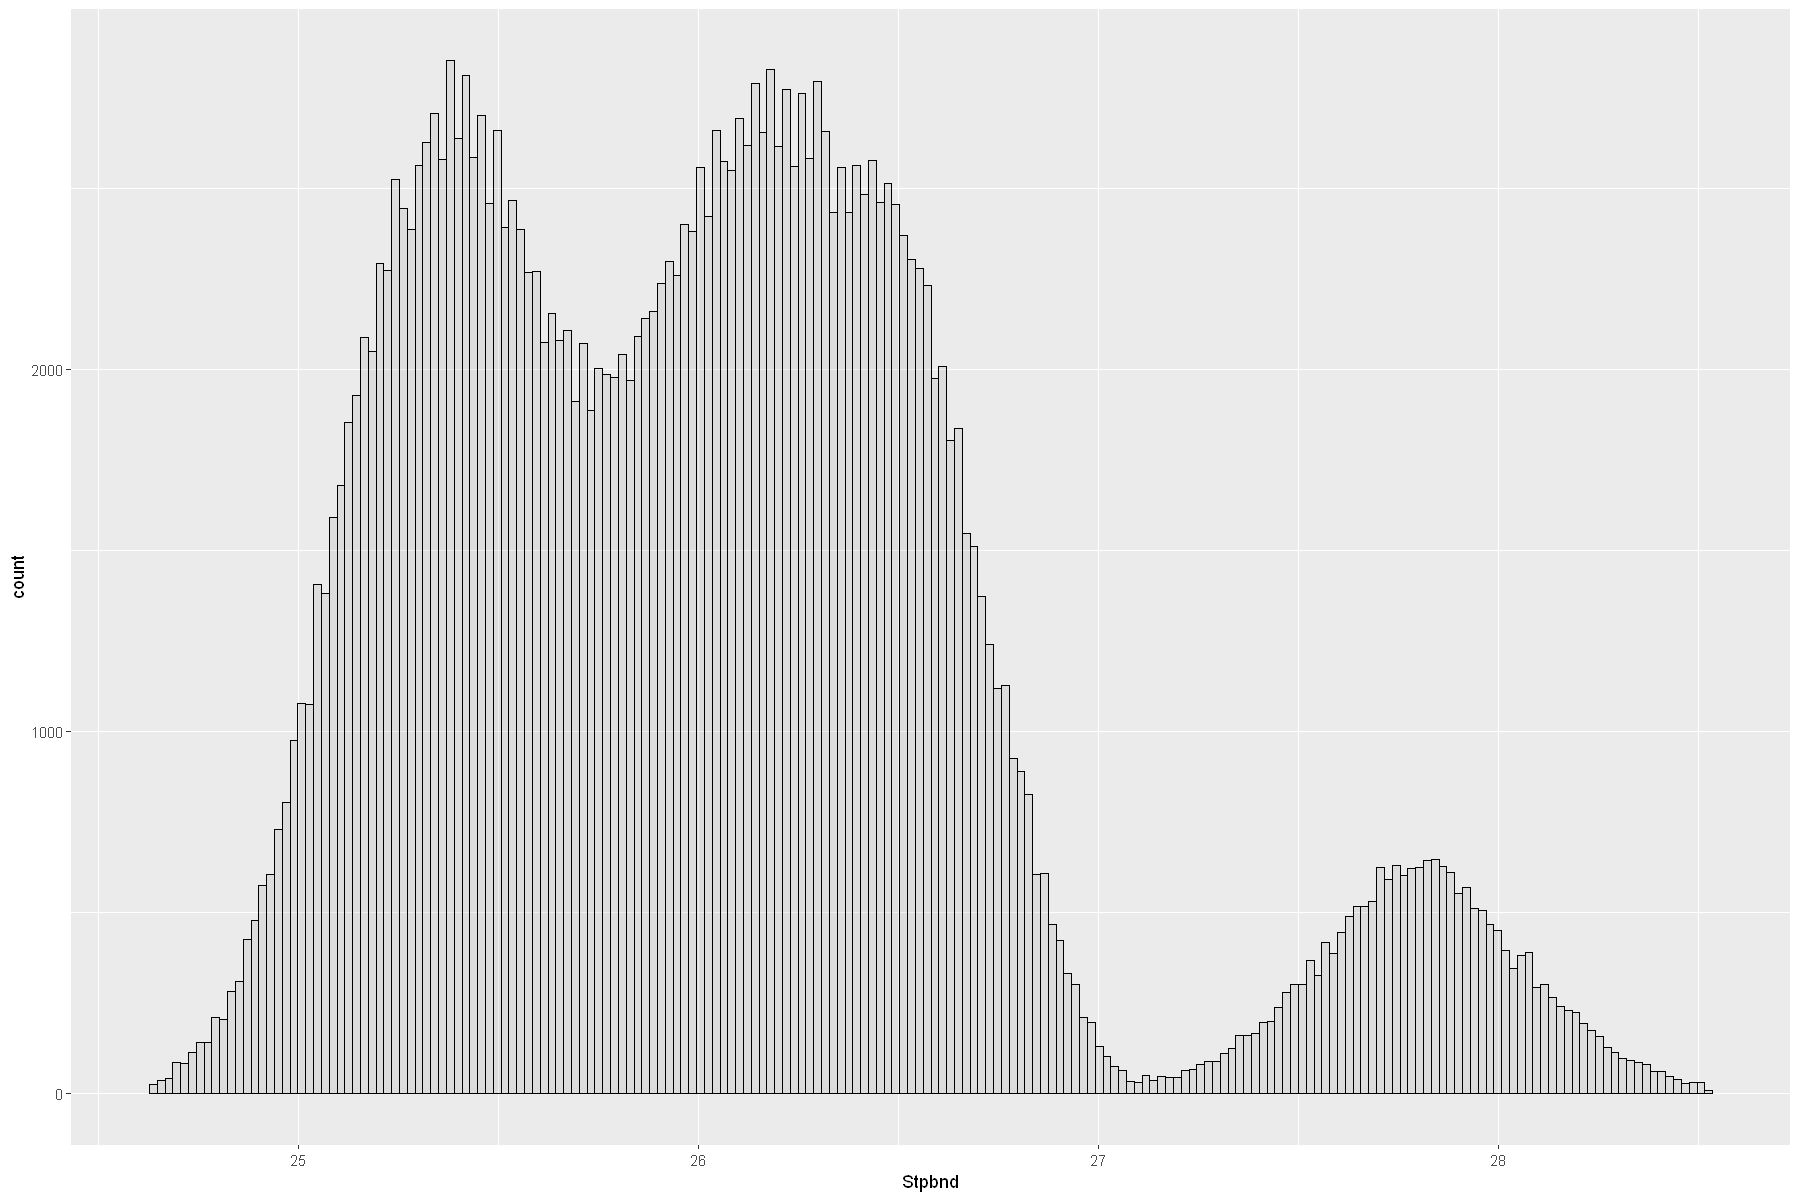

In [21]:
library(repr)
options(repr.plot.width=15, repr.plot.height=10)
ggplot(Data_clean, aes(x=Stpbnd, fill=Stpbnd)) + 
    geom_histogram(bins=200, alpha=0.1, position="dodge", colour = "black") + 
    NULL

## 11. Asigne un color por cada lote diferente y obtenga nuevamente el histograma

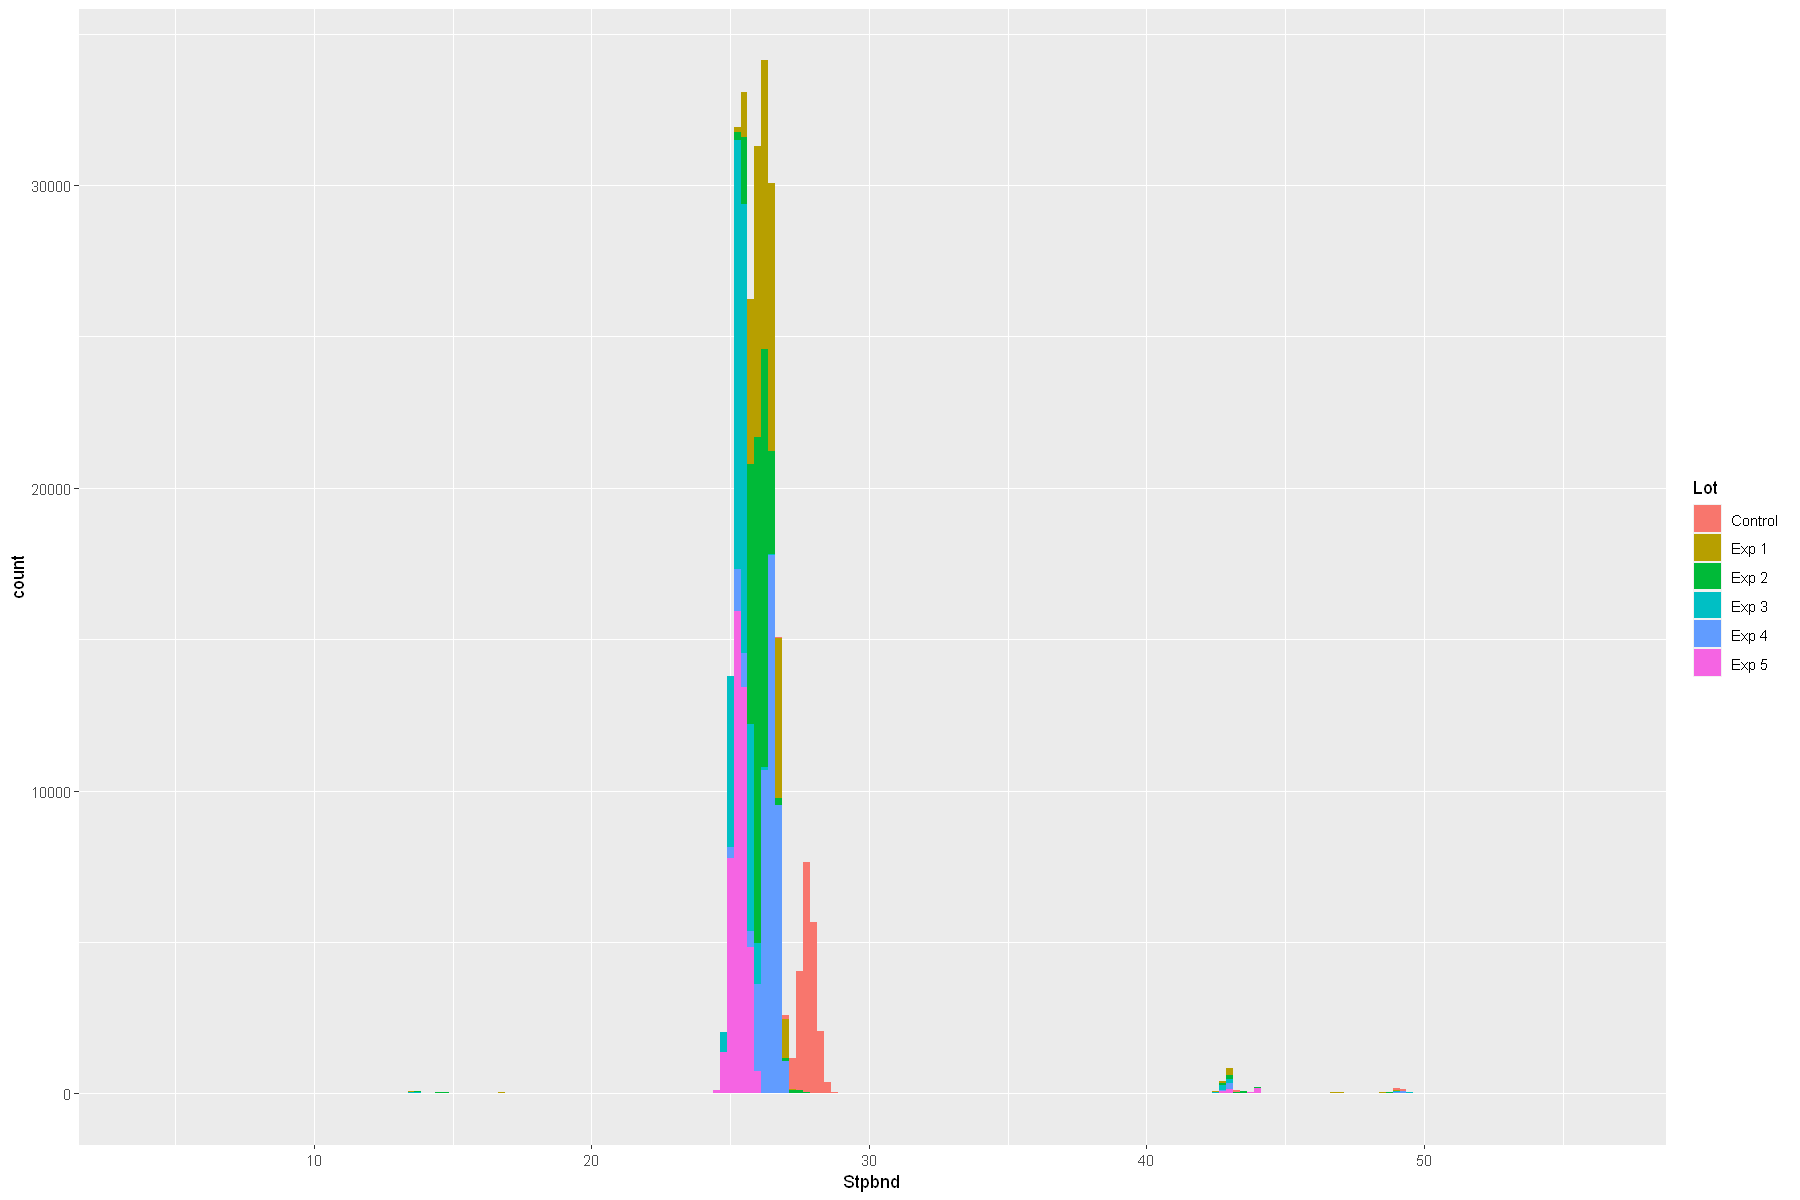

In [22]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(Data, aes(Stpbnd, fill = Lot)) +
  geom_histogram(binwidth = 0.25)

## Histograma por lote - Sin outliers

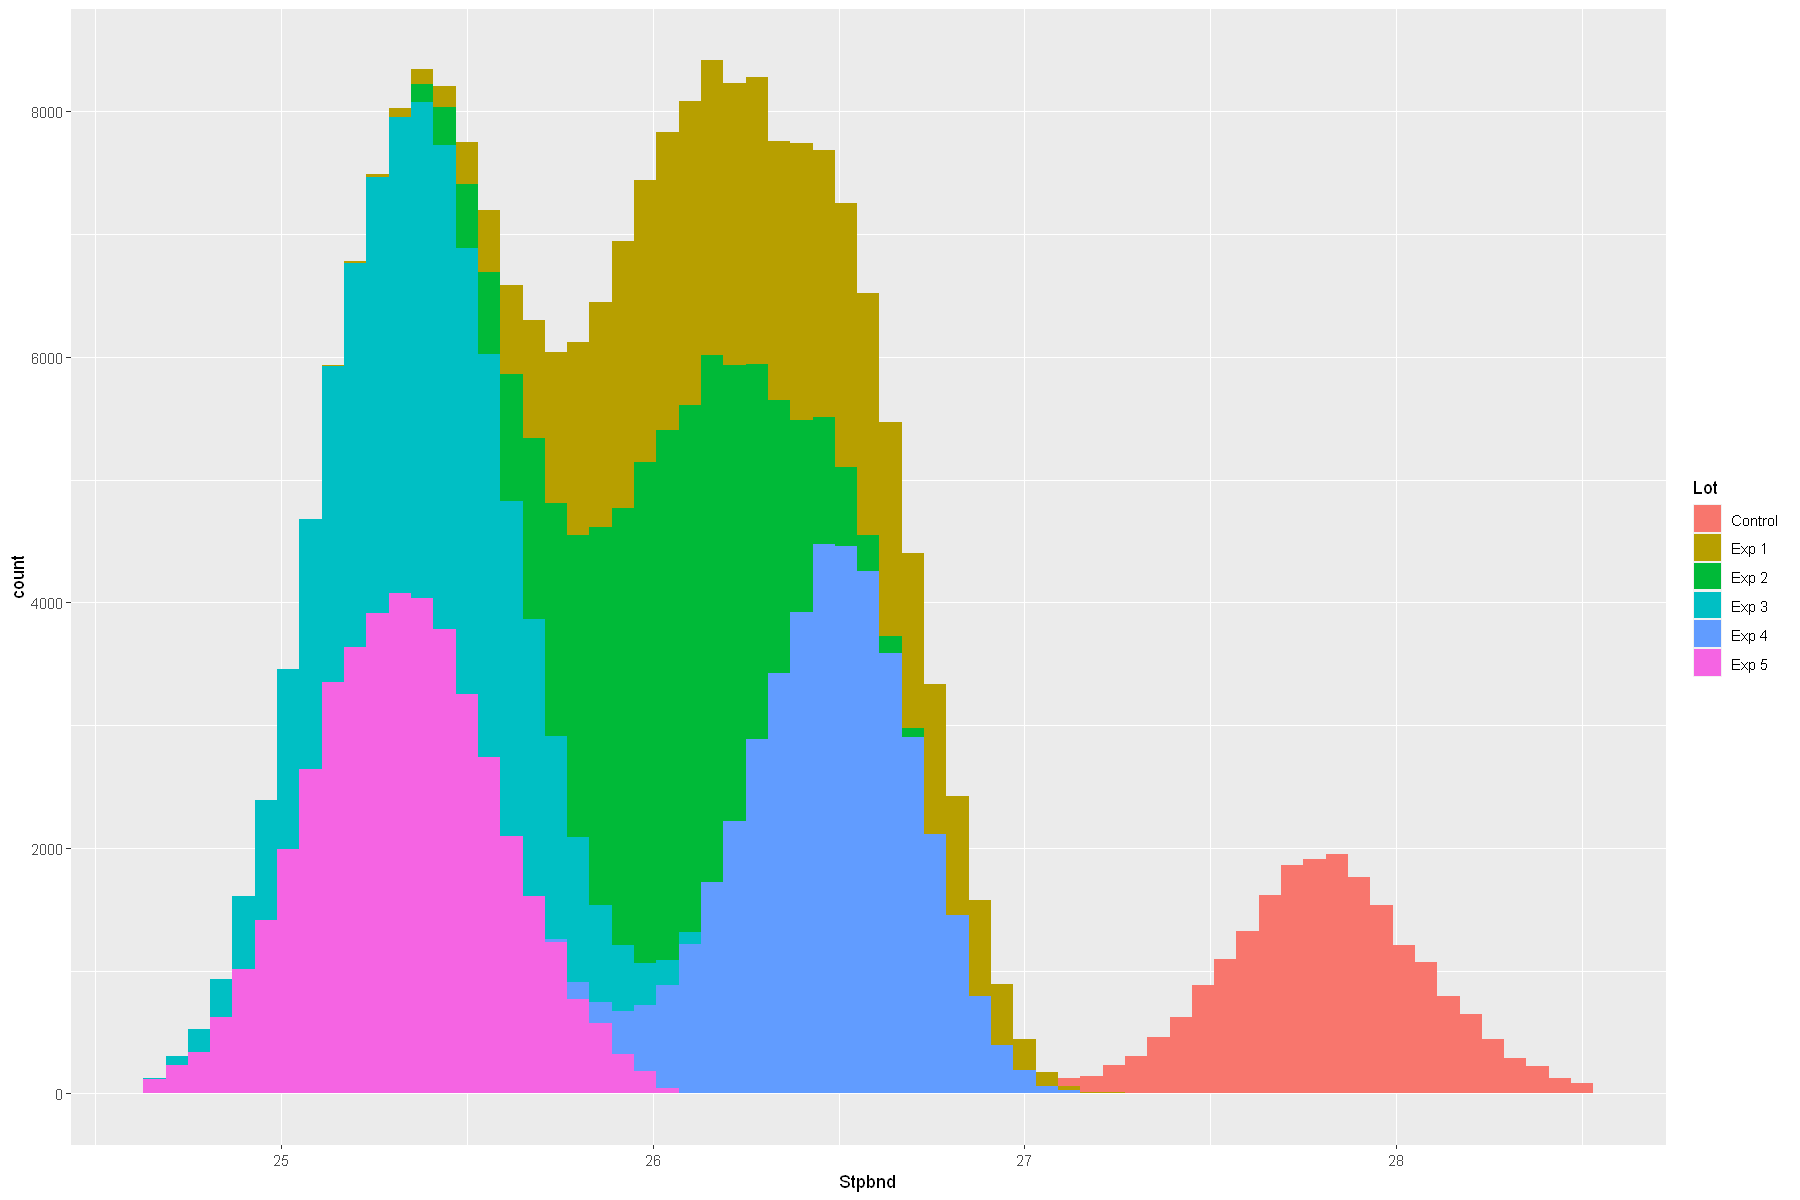

In [23]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot(Data_clean, aes(Stpbnd, fill = Lot)) +
  geom_histogram(binwidth = 0.06) 

## 13. Obtenga un gráfico de cajas y bigotes, las categorías del eje X serán los nombres de cada lote de evaluación y el eje Y será la especificación Stpbnd(2400-2482)(S21)(1). Utilice todos los datos (incluya los outliers en caso de haberlos eliminado antes).

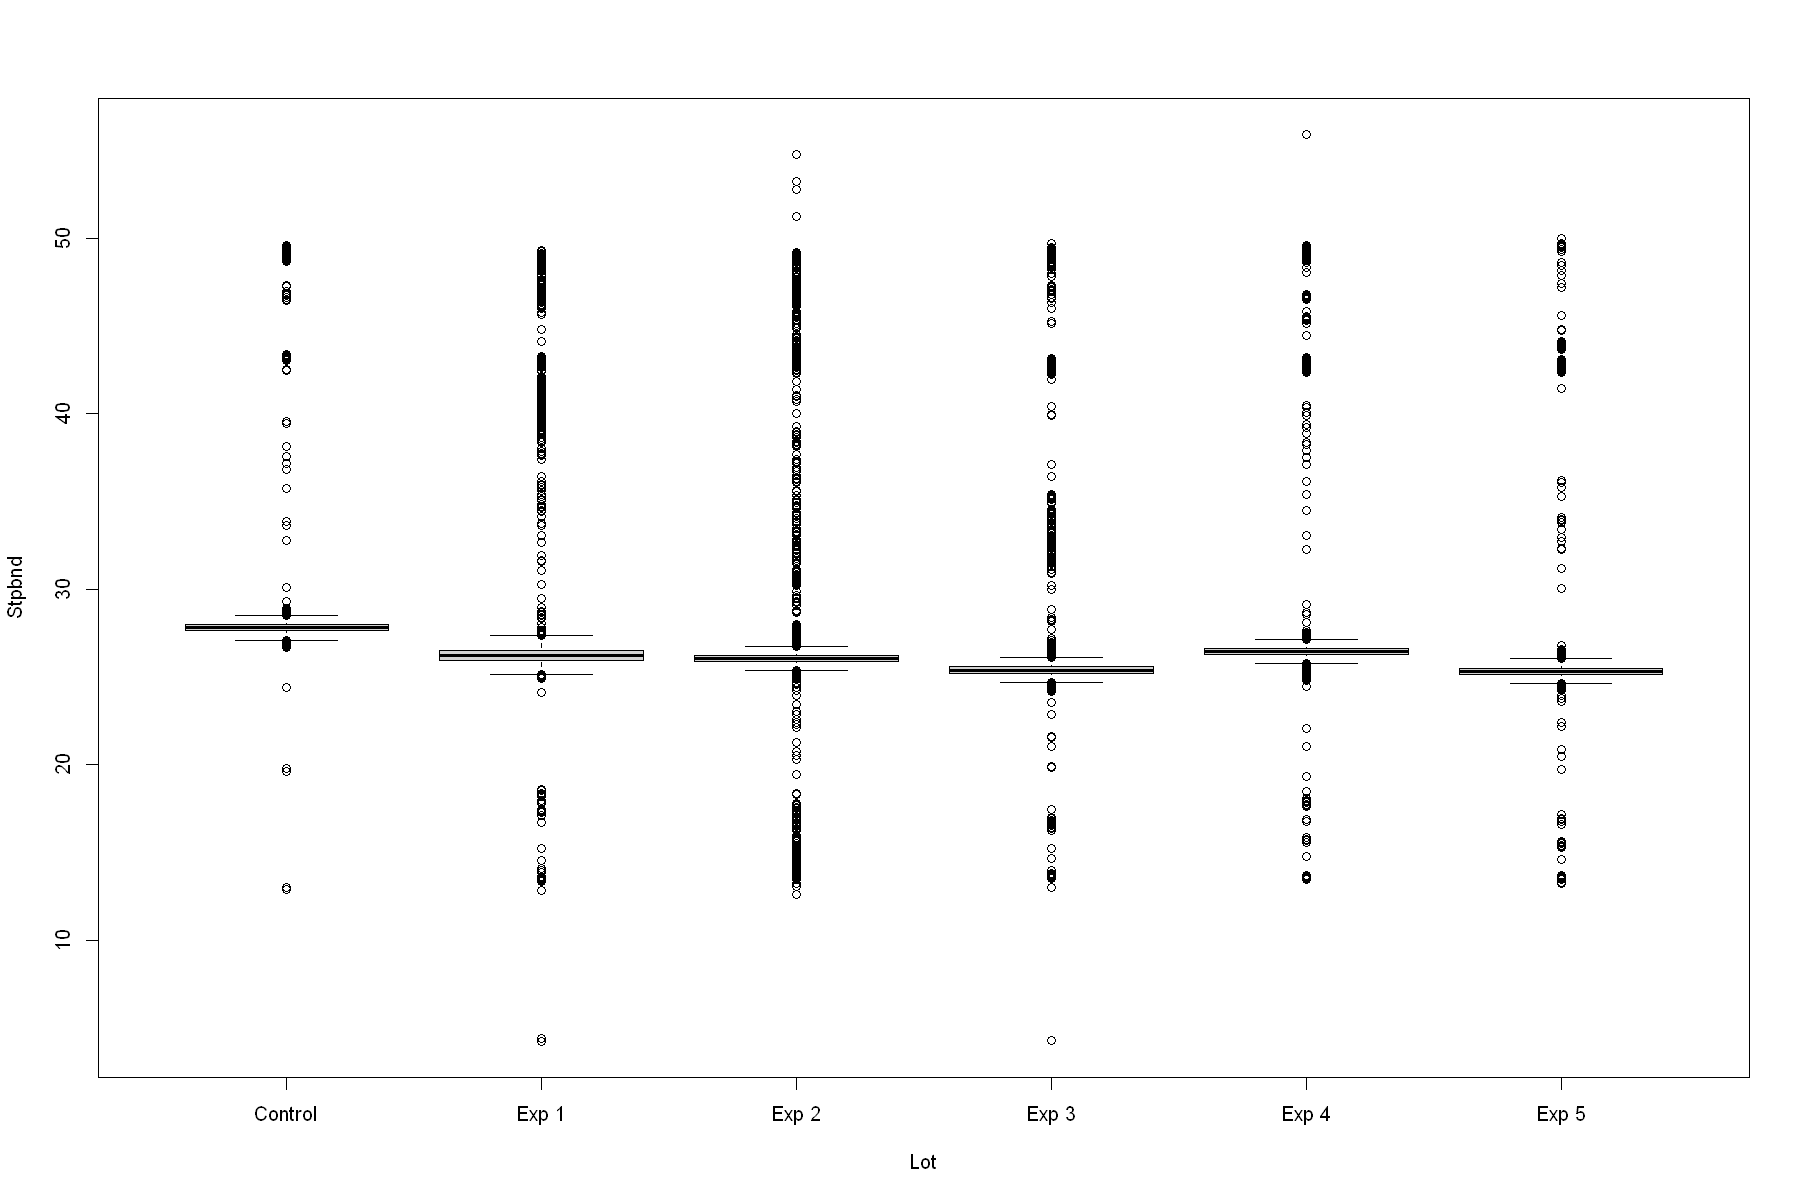

In [24]:
box_plot <- boxplot(Stpbnd ~ Lot, data = Data)

## 14. Ajuste la escala del eje Y para que tenga un mínimo igual a 24 y un máximo igual a 30.

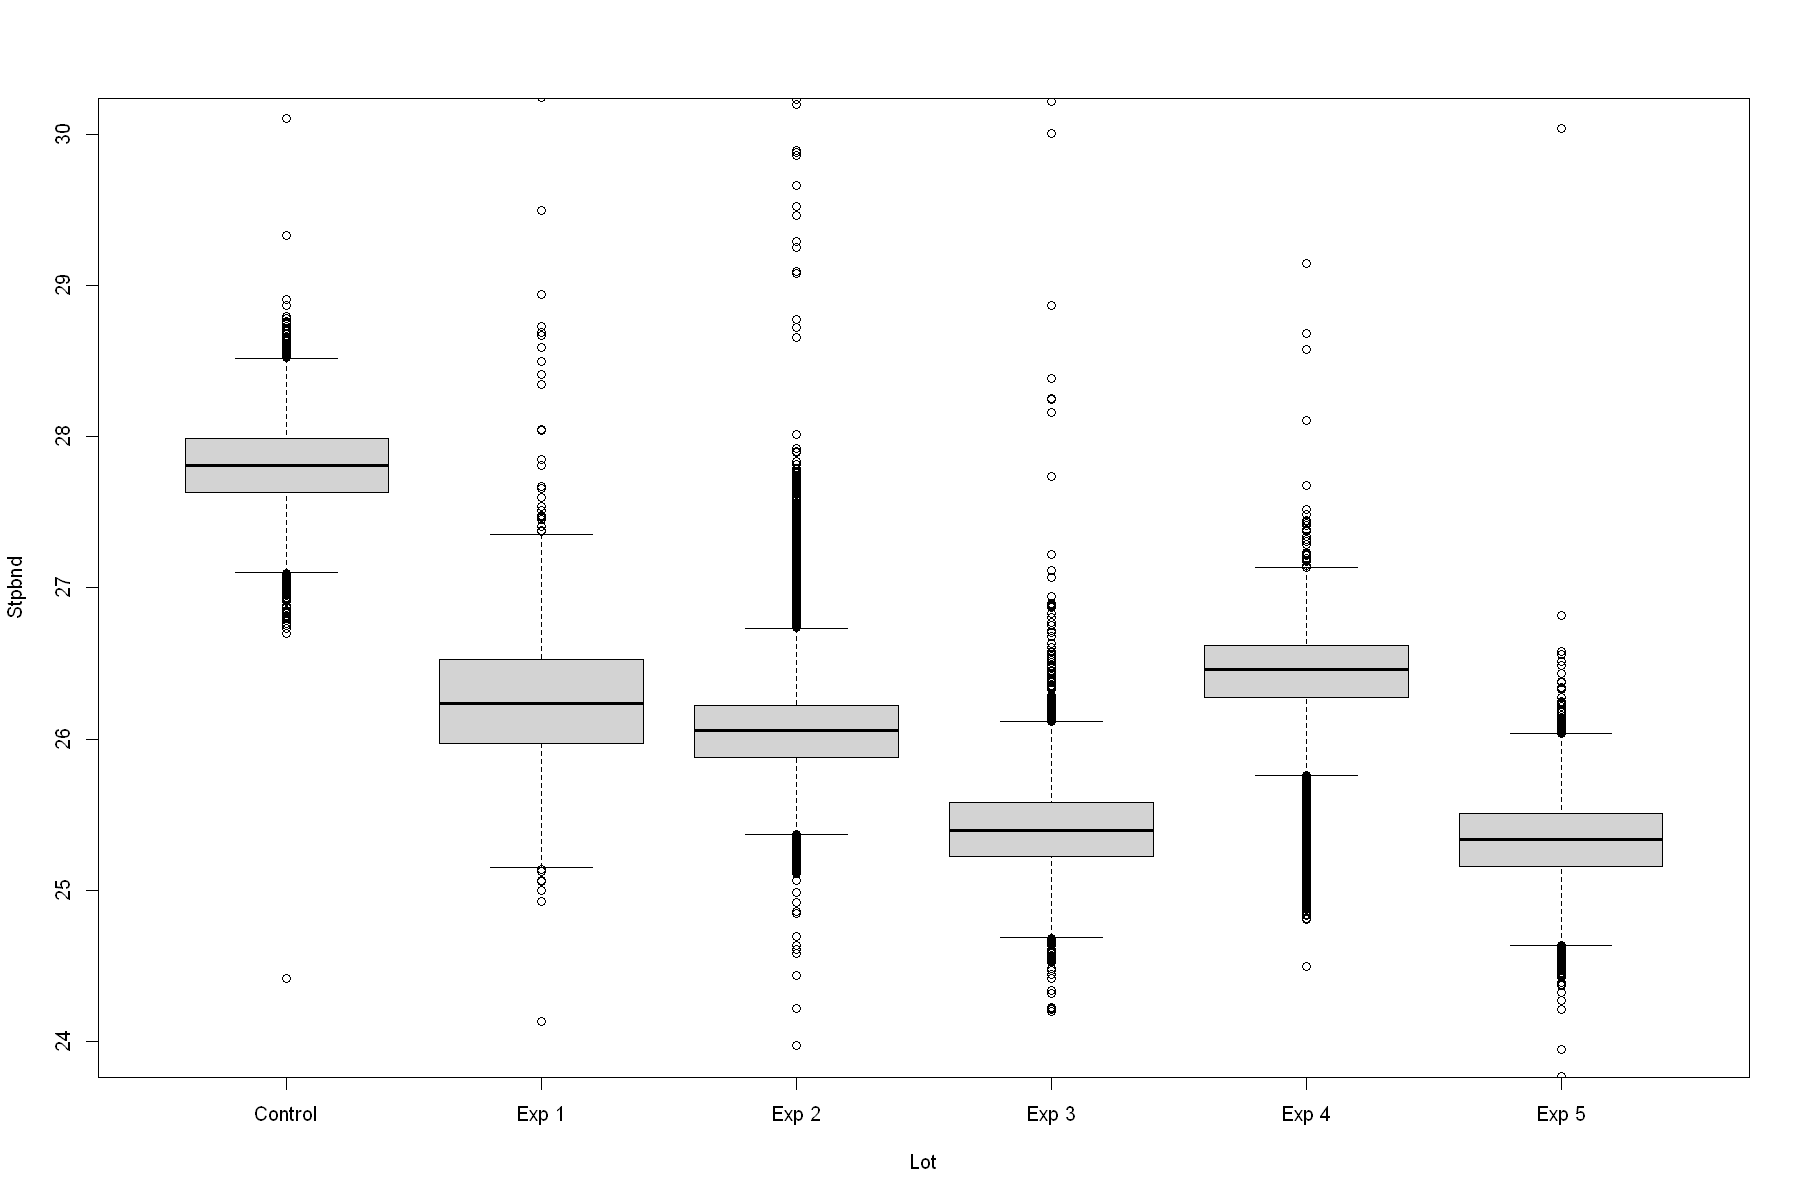

In [25]:
box_plot_scale <- boxplot(Stpbnd ~ Lot, data = Data, ylim=c(24, 30))

## Histogramas individuales de experimentos contra datos de control - sin outliers

In [32]:
Control = Data_clean$Stpbnd[Data_clean$Lot == "Control"]
E1 = Data_clean$Stpbnd[Data_clean$Lot == "Exp 1"]
E2 = Data_clean$Stpbnd[Data_clean$Lot == "Exp 2"]
E3 = Data_clean$Stpbnd[Data_clean$Lot == "Exp 3"]
E4 = Data_clean$Stpbnd[Data_clean$Lot == "Exp 4"]
E5 = Data_clean$Stpbnd[Data_clean$Lot == "Exp 5"]

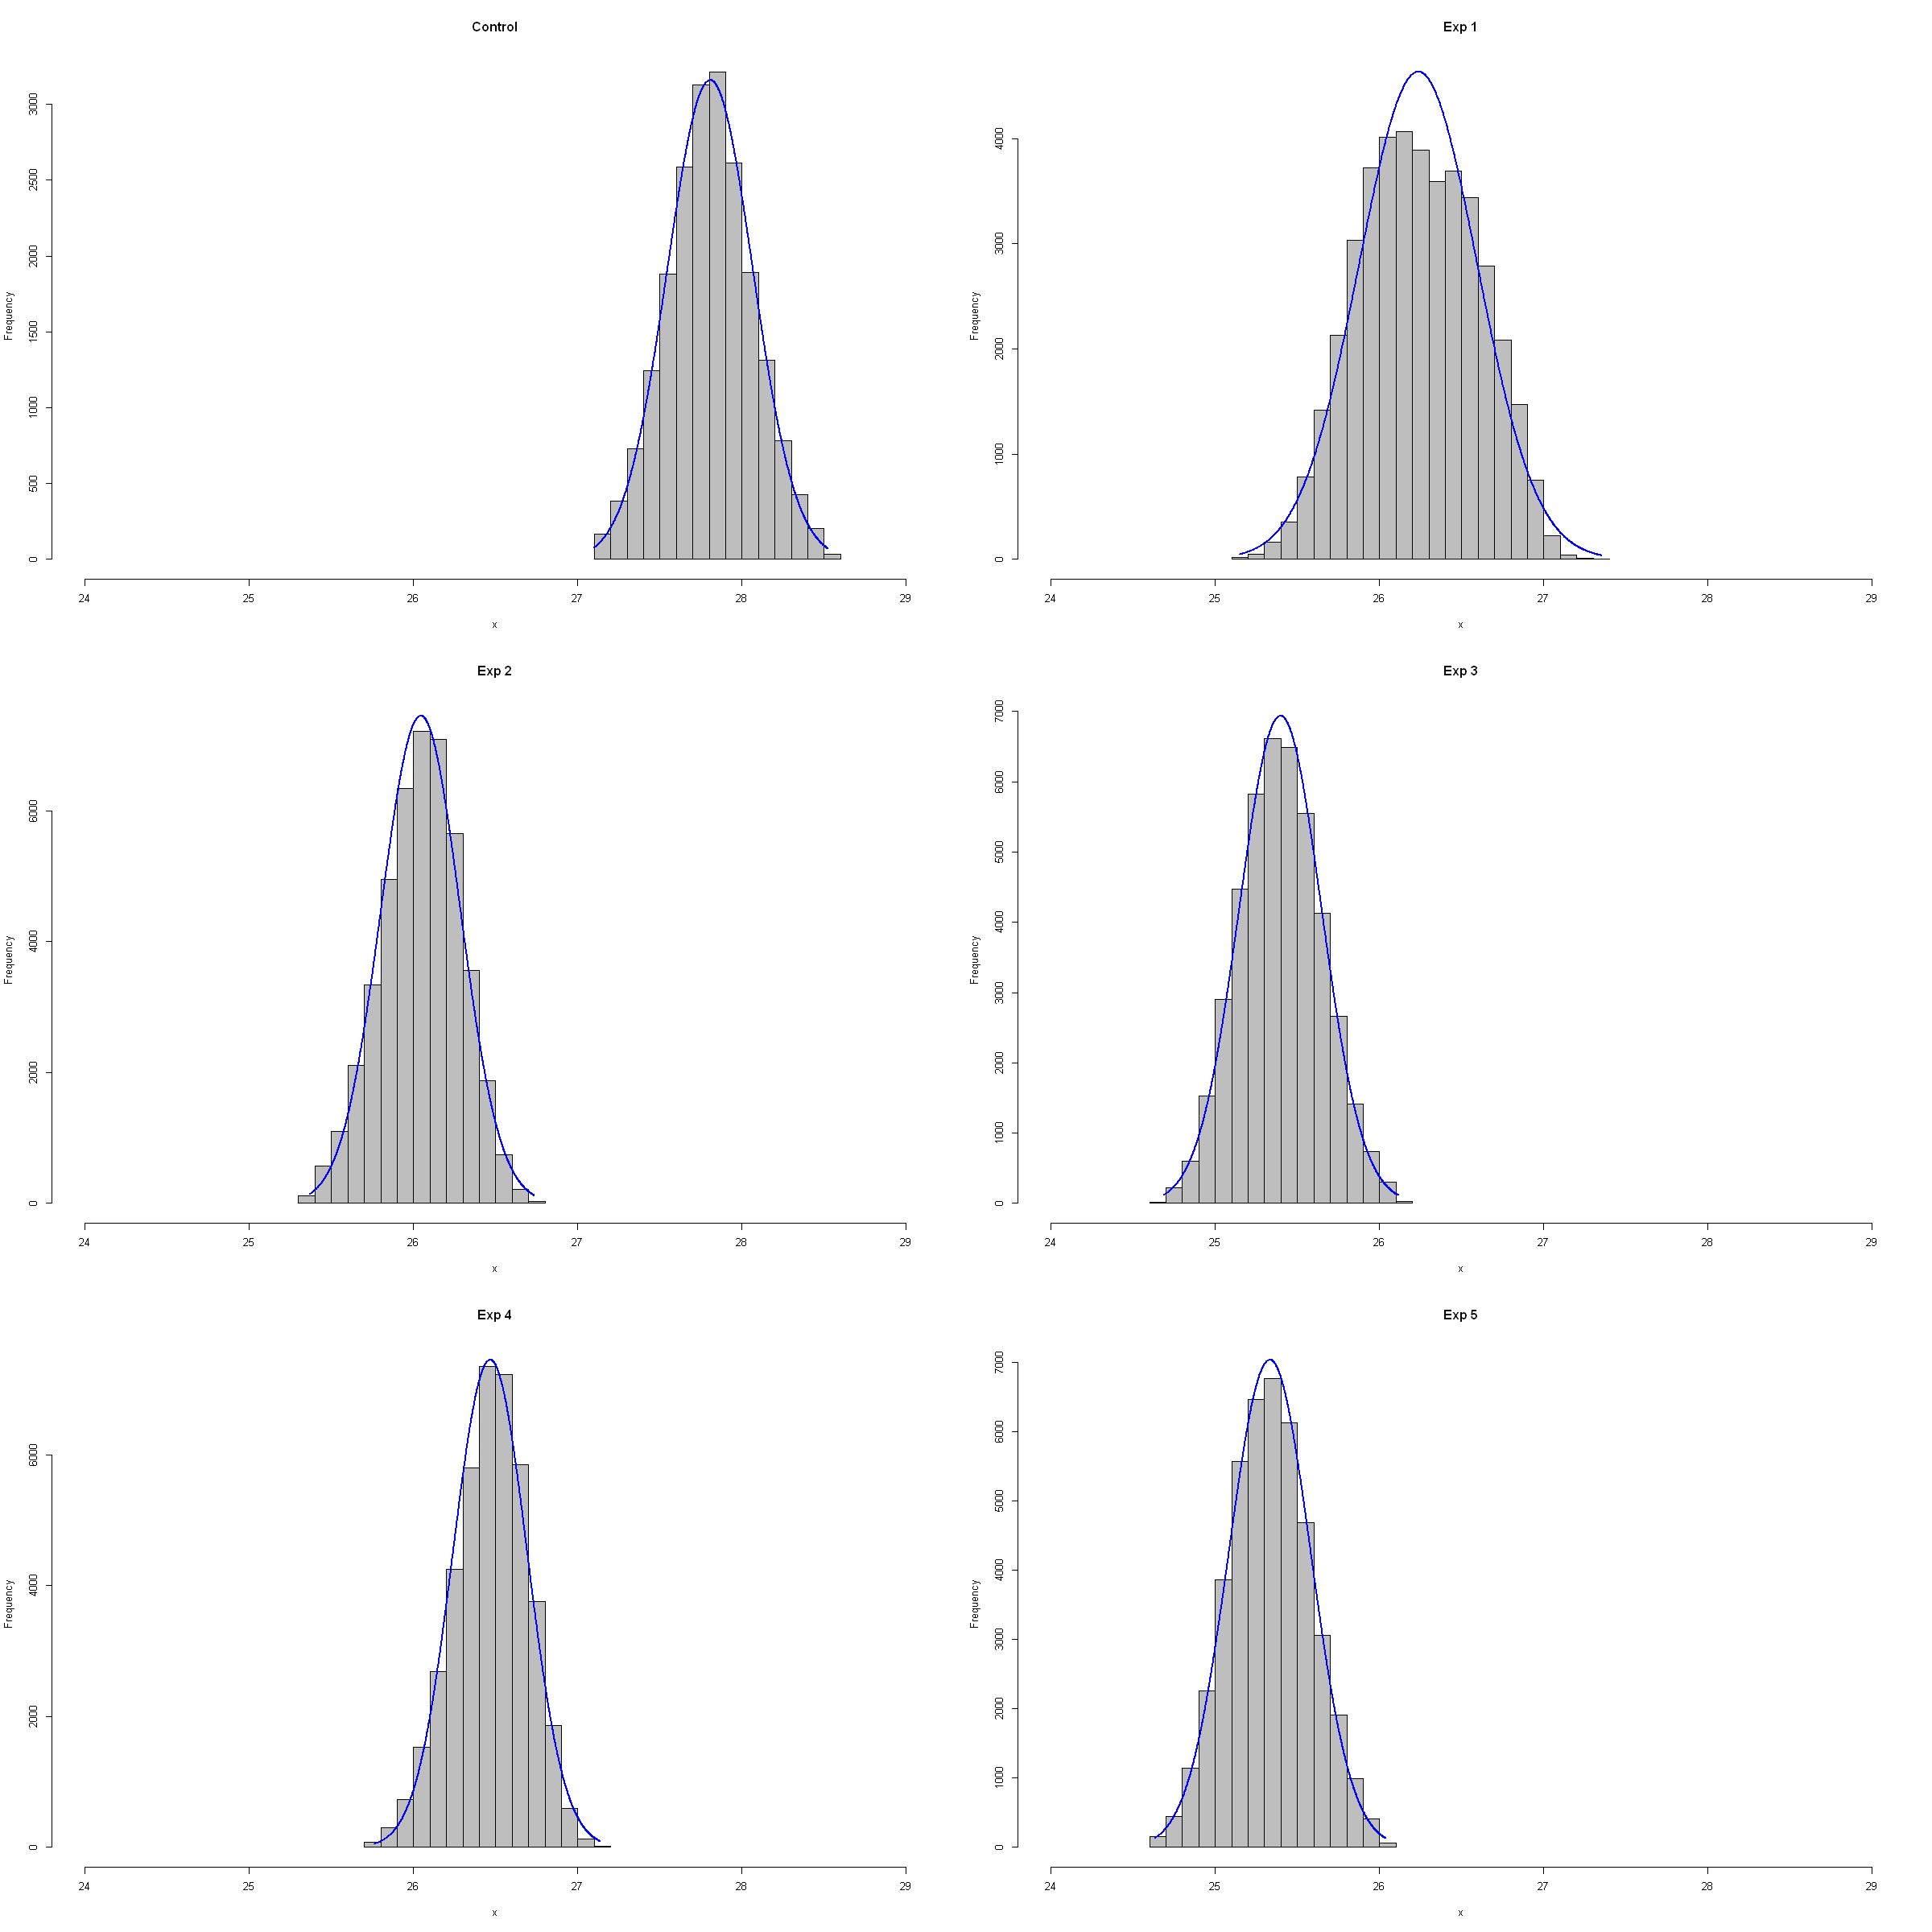

In [51]:
options(repr.plot.width=20, repr.plot.height=20)
par(mfrow=c(3,2))
plotNormalHistogram(Control, xlim = c(24,29), main = "Control")
plotNormalHistogram(E1, xlim = c(24,29), main = "Exp 1")
plotNormalHistogram(E2, xlim = c(24,29), main = "Exp 2")
plotNormalHistogram(E3, xlim = c(24,29), main = "Exp 3")
plotNormalHistogram(E4, xlim = c(24,29), main = "Exp 4")
plotNormalHistogram(E5, xlim = c(24,29), main = "Exp 5")